# Decaptcha Pipeline

### Set-up

In [29]:
!pip install numpy
!pip install opencv-python
!pip install glob2
!pip install scipy
!pip install matplotlib
!pip install pytesseract
!pip install imutils
!pip install pandas
!pip install seaborn
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=335f5bff11449735439fc79ecac0b9d917e71488fd099cc9d39788b3b471e5b9
  Stored in directory: c:\users\felipe\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [31]:
import os as os
import numpy as np
import cv2 as cv
import glob
from scipy import misc
%matplotlib inline
import matplotlib.pyplot as plt
import pytesseract
import imutils
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [32]:
# change the directory to where you have the images stored
# if image directory is not relative to this file's location, insert path directly into folder_dir =
# if it's in an online repo, change to use urllib (import the library too)
os.chdir('..')
folder_dir = os.getcwd() + "\\Repository\\TextCAPTCHA_Standard_Dataset" #If on MacOS/Linux - change \\ to /

### Pre-processing and Segmentation

In [33]:
# iterate over files in that directory
for images in glob.iglob(f'{folder_dir}\\*'): #If on MacOS/Linux - change \\ to /
    
    pic = cv.imread(images)
    
    # these are all the variables for each pre-processing module applied to all the images in the folder
    # the interger values can be changed, from the opencv library documentation: "The second argument is the threshold value 
    # which is used to classify the pixel values. 
    #The third argument is the maximum value which is assigned to pixel values exceeding the threshold"
    # The parameters are image, sigmaX and sigmaY, and border type
    
    gray_pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray_pic, (5, 5), 0)
    ret,thresh1 = cv.threshold(gray_pic,175,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(gray_pic,140,255,cv.THRESH_BINARY_INV)
    ret,thresh4 = cv.threshold(blur,100,190,cv.THRESH_BINARY)
    
    
    
    
    # more image processing and de-noising
    kernel = np.ones((2,2), np.uint8)
    dilation = cv.dilate(gray_pic, kernel, iterations = 1)
    dilation2 = cv.dilate(blur, kernel, iterations = 1)
    dilation3 = cv.dilate(thresh4, kernel, iterations = 1)
    
    erosion = cv.erode(dilation, kernel, iterations = 1)
    erosion2 = cv.erode(dilation2, kernel, iterations = 1)
    erosion3 = cv.erode(dilation3, kernel, iterations = 1)
    
    # You will need to check with the segmentation team about these values, as I believe they are arbitary - which 
    # may not work with each image - you can see from the 3rd image, the last box doesn't fully capture the "m"
    # this maybe intended, but we may have to fine tune for the next iteration of the project
    # x, y, w, h = 31, 13, 21, 39
    x, y, w, h = 31, 11, 21, 40
    #Titles and images to display in the plot - the titles may need adjusted depending on what pro-processing image
    #you want to plot
    titles = ['Original Image','Gray','BINARY','BINARY_INV', 'Blur', "Blur + threshold", "dilation1", "dilation2", "dilation3", "Gaussian + Otsu"]
    
    # this is not showing every single pre-processing variable, however, you can add more/take some away, you will
    # have to adjust the for loop if you change this
    images = [pic, gray_pic, thresh1, thresh2, blur, thresh4, dilation, dilation2, dilation3, erosion3]

    # i have added this so that the while loop that plots the lines around each image doesn't keep dupliacting
    p = 1    

### Display Pre-processing and Segmentation

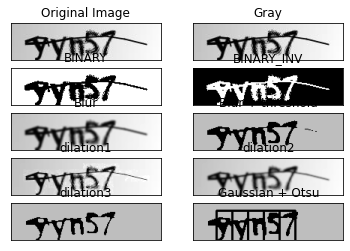

In [34]:
    #for all the items in the folder, iterate over each and display all the pre-processing included in the images variable:
for i, item in enumerate(images):

        plt.subplot(5,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        
       
        while p < 6:
            cv.rectangle(erosion3, (x, y), (x + w, y + h), (0, 255, 0), 2)
            x += w
            p+=1
        
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
plt.show()
    

### Recognition

### Post-processing